# CNN for Galaxy Morphology + Webapp
### Student id: C00313459
### Name: Amisha Das

## 1. Introduction

This is a basic CNN made from scratch to predict a galaxy's type. At the end there is also a webapp that the user can use to input an image and get its predicted type.


[Data Source](https://astronn.readthedocs.io/en/latest/galaxy10.html)

- Data can also be downloaded from [here](https://www.kaggle.com/datasets/amydas/desi-galaxy-images-best-for-cnn) or the following cell as it is a large data set

In [ ]:
# !pip install astroNN
# from astroNN.datasets import galaxy10
# galaxy10.load_data()

In [1]:
import h5py

file_path="Galaxy10.h5"

# 2. Data

In [2]:
with h5py.File(file_path, 'r') as f:
    print(f.keys())
    images = f['images'][:].astype('float32') / 255.0
    labels = f['ans'][:]

print("Image Shape:", images.shape)
print("Labels Shape:", labels.shape)

<KeysViewHDF5 ['ans', 'images']>
Image Shape: (21785, 69, 69, 3)
Labels Shape: (21785,)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

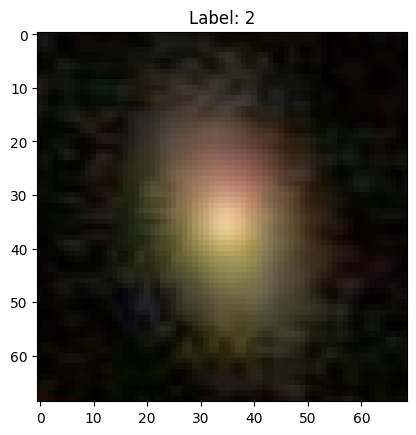

In [3]:
plt.imshow(images[0])
plt.title(f"Label: {labels[0]}")
plt.show()

# 2.2. Preparing the data

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
X = (images / 255.0).astype('float32')
y = to_categorical(labels, num_classes=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3 CNN model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(69, 69, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 67, 67, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 67, 67, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 33, 33, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 31, 31, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 13, 13, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 685,386 (2.61 MB)

 Trainable params: 684,938 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

# 4. Training

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.2, verbose=1)
]

history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, callbacks=callbacks)


Epoch 1/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 26s 54ms/step - accuracy: 0.3788 - loss: 1.6642 - val_accuracy: 0.3144 - val_loss: 1.8702 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.5221 - loss: 1.2125 - val_accuracy: 0.1773 - val_loss: 2.6642 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.5569 - loss: 1.0967 - val_accuracy: 0.0290 - val_loss: 6.3661 - learning_rate: 0.0010
Epoch 4/30
435/436 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6253 - loss: 0.9847
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
436/436 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.6253 - loss: 0.9847 - val_accuracy: 0.0720 - val_loss: 14.2808 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.6690 - loss: 0.8437 - val_accuracy: 0.6314 - val_loss: 0.9096 - learning_rate: 2.0000e-04
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.7050

# 5. Evaluating 

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7864 - loss: 0.6127
Test Accuracy: 0.787468433380127


In [13]:
model.save("galaxy_cnn_model.h5")


# 6. WebApp

The accompanying webapp based on this model can be found [here](https://cnnapp-amisha.streamlit.app/](https://cnnapp-amisha.streamlit.app/).

# Appendices, Acknowledgments and References

- https://github.com/henrysky/astroNN
- https://www.kaggle.com/code/amydas/basic-cnn-to-classify-galaxy-morphology
- ChatGPT for debugging